<a href="https://colab.research.google.com/github/kimleone/Support-Vector-Machine/blob/master/Svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Support Vector Machine - 01



In [6]:
#install.packages('Amelia')
#install.packages('Hmisc')
#install.packages('caTools')
#install.packages('e1071')
#install.packages('caret')
#install.packages('corrplot')

library(Amelia)
library(Hmisc)
library(caTools)
library(e1071)
library(caret)
library(corrplot)

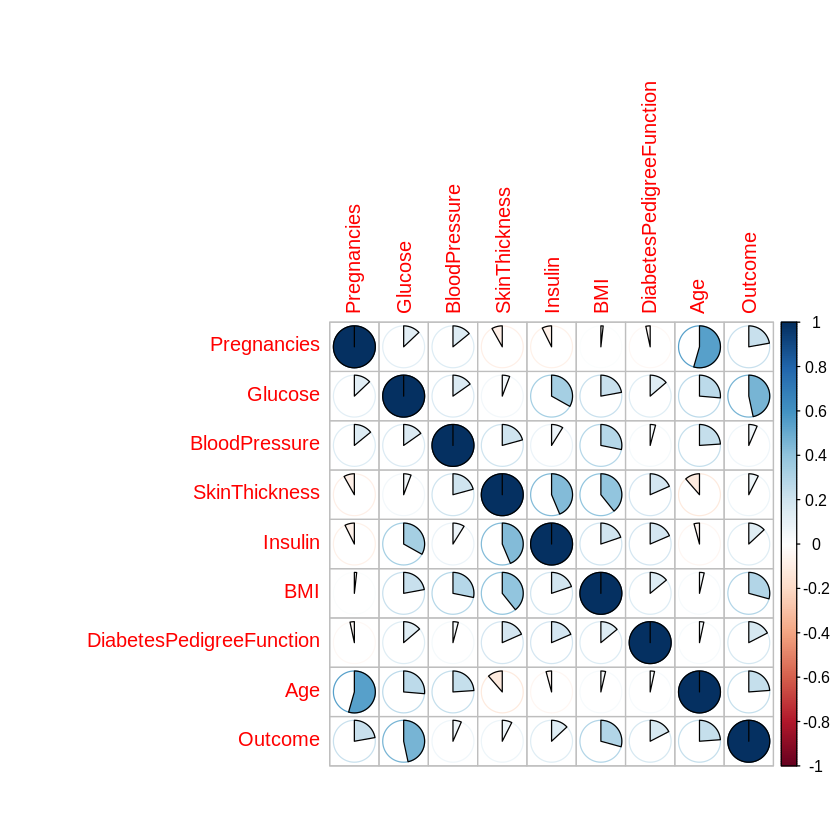

In [37]:
Dados <- read.table('https://raw.githubusercontent.com/kimleone/Support-Vector-Machine/master/diabetes.csv',sep = ',',header = TRUE)
corrplot(cor(Dados), method ='pie')

In [38]:
Dados[-c(1,9)][Dados[-c(1,9)] == 0] <- NA

Dados$Outcome[Dados$Outcome ==  0] <- 'Saudável'
Dados$Outcome[Dados$Outcome == 1] <- 'Diabética'

Dados$Outcome <- factor(Dados$Outcome)
summary(Dados)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.7   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
                  NA's   :5       NA's   :35       NA's   :227    
    Insulin            BMI        DiabetesPedigreeFunction      Age       
 Min.   : 14.00   Min.   :18.20   Min.   :0.0780           Min.   :21.00  
 1st Qu.: 76.25   1st Qu.:27.50   1st Qu.:0.2437           1st Qu.:24.00  
 Median :125.00   Median :32.30   Median :0.3725           Median :29.00  
 Mean   :155.55   Mean   :32.46   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:190.00   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0

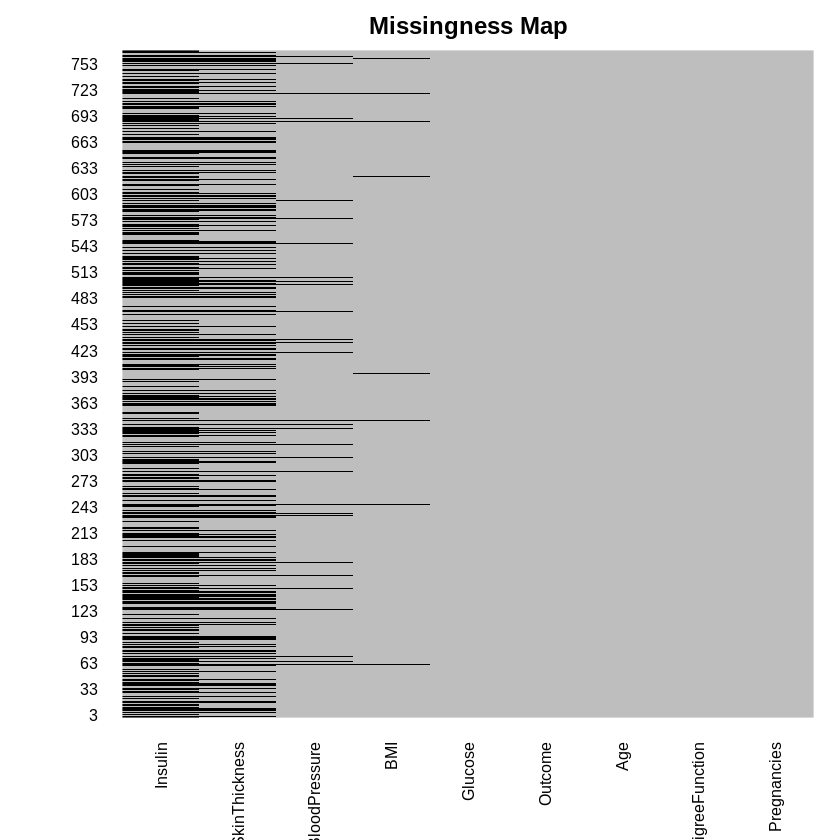

In [39]:
missmap(Dados, col=c("black", "grey"), legend=FALSE)##Gráfico para vizualização de valores faltantes

*  48,69% da variável Insulina é de valores faltantes. Ela apresenta uma correlação de 0,13 a terceira menor correlação com a variável resultado.
* As duas variáveis que apresentam menor correlação são também as que apresentam mais valores faltantes.

### Para não perder muita informação excluiremos as duas variáveis que apresentam as menores correlações com o resultado (insulina e espessura da pele).
   

In [40]:
Dados <- Dados[-c(4,5)] #Removendo as variáveis insulina e espessura de pele (Muitos valores missing)
Dados <- Dados[complete.cases(Dados),] ##Removendo os valores faltantes das demais variáveis

###Análise exploratória


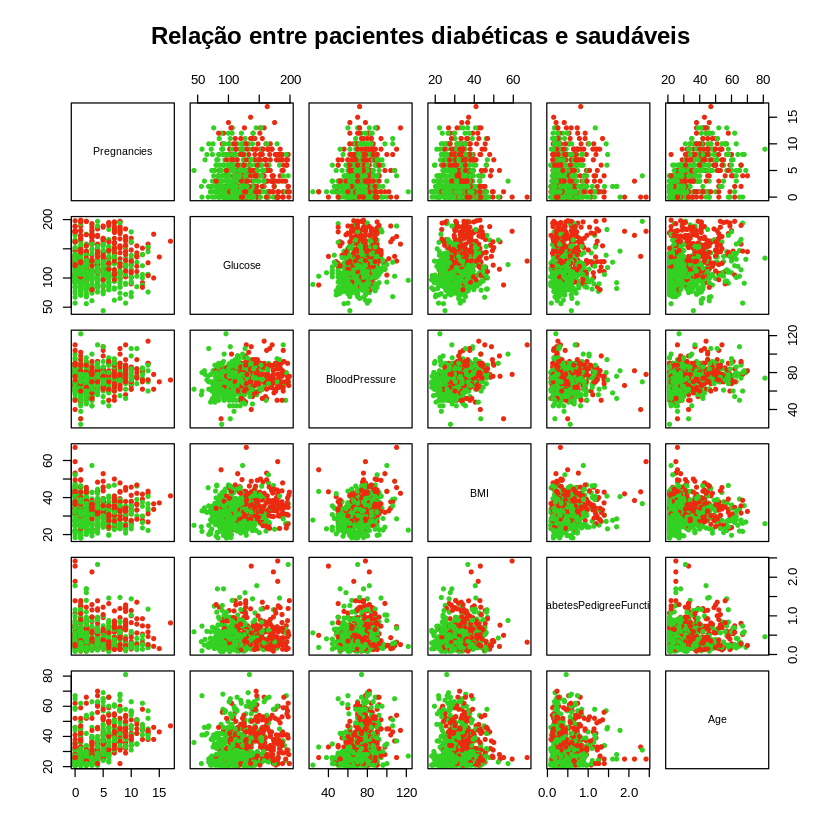

In [41]:
#saudáveis verdes
#diabéticos vermelhos
colors = c("#eb2a10","#33d121")
colors <- colors[Dados$Outcome]

plot(Dados[-7], pch = 20, col = colors, main = 'Relação entre pacientes diabéticas e saudáveis')

### Support Vector Machine

In [42]:
treino <- sample(1:724,0.7*724)
teste <- setdiff(1:724, treino)

Dados_treino <- Dados[treino, ]
Dados_teste <- Dados[teste, ]

In [47]:
modelo1 <- svm(Outcome ~ . , data = Dados_treino)

In [48]:
preditos1 <- predict(modelo1, Dados_teste)

m_c <- table(preditos1,Dados_teste$Outcome)

sensibilidade =(m_c[1,1])/(m_c[1,1]+m_c[2,1])
acuracia = (m_c[1,1]+m_c[2,2])/(sum(m_c))


In [49]:
sensibilidade

[1] 0.4691358

In [50]:
acuracia

[1] 0.7568807